# CAFE


1. Callibrate tree using the R package APE
2. Run CAFE to identify gene family expansions and contractions. Gene families are defined as the Orthogroups foud by Orthofindr

## APE  package in R

- APE allows to callibrate a tree in multiple points.

- I used it to callibrate my tree on 4 nodes:

    *Blattodea + Oryhoptera. Misof node 130, 248mya
    *Holometabola, misfo node 37, 345mya
    *Tree root, holo+hemi,133, 390 ~mya misof node (I allowed +-5)
    *hemiptera+thrips, misof 37, 339mya


- I used an "strict clock" model  (model = "discrete", control = chronos.control(nb.rate.cat =1)). Which gave me the best ages on other nodes.


- R code:

-------


```r

setwd("Gene_Family_expansions")
library("ape")
library(phytools)
InputTree<-read.tree("Fasttree_out_fullnames_rooted.tree")

nodestocallibrate <- c(
  getMRCA(InputTree, tip = c("Gryllus_bimaculatus","Blattella_germanica") ),
  getMRCA(InputTree, tip = c("Apis_mellifera","Drosophila_melanogaster") ),
  getMRCA(InputTree, tip = c("Gryllus_bimaculatus","Drosophila_melanogaster") ),
  getMRCA(InputTree, tip = c("Frankliniella_occidentalis","Acyrthosiphon_pisum") ) 
  
) 
age.min <- c(
  248,
  345,
  385,
  339
)
age.max <- c(
  248,
  345,
  395,
  339
)

my_4points <- data.frame(nodestocallibrate, age.min, age.max) 

mycalibration2 <- makeChronosCalib(InputTree,node=nodestocallibrate, my_4points)
### strict clock model:
mytimetree_4poitnscallibrated <- chronos(InputTree,  model = "discrete", calibration = mycalibration2, control = chronos.control(nb.rate.cat =1) )
mytimetree_4poitnscallibrated


```

## APE result:

**Fasttree_out_fullnames_rooted_Ape_chronos_Callirated_4points.tree**


(((Frankliniella_occidentalis:339,((Acyrthosiphon_pisum:40.38991217,Sipha_flava:40.38991217):254.0640153,(Laodelphax_striatella:48.99958058,Nilaparvata_lugens:48.99958058):245.4543469):44.5460725):35.82192079,(Pediculus_humanus:362.4323662,(Apis_mellifera:345,(Tribolium_castaneum:314.9941411,(Drosophila_melanogaster:279.4348203,Bombyx_mori:279.4348203):35.55932079):30.00585895):17.43236624):12.38955455):13.58490598,((Blattella_germanica:112.528622,(Cryptotermes_secundus:61.00174814,Zootermopsis_nevadensis:61.00174814):51.52687381):135.471378,((Gryllus_bimaculatus:89.20882147,Laupala_kohalensis:89.20882147):126.4915381,Locusta_migratoria:215.7003595):32.29964046):140.4068268);

## Gene Families File

CAFE requires a file in which for each gene family there is the number of genes in each species.

Tutorial recommends: You can  remove  gene  families  with  large  variance  from  your  dataset,  but  we  found  that putting aside the gene families in which one or more species have≥ 100 gene copies doesthe tric


**CAFE doesn't like to have long names of with _... So I I change whole names to abbreviations**

In [ ]:

dictionary_spp_file= {"Api" : "Acyrthosiphon_pisum",
        "Fca" : "Folsomia_candida",
        "Lmi" : "Locusta_migratoria",
        "Rma" : "Rhopalosiphum_maidis",
        "Ago" : "Aphis_gossypii",
        "Msa" : "Melanaphis_sacchari",
        "Sfl" : "Sipha_flava",
        "Bge" : "Blattella_germanica",
        "Gbi" : "Gryllus_bimaculatus",
        "Mpe" : "Myzus_persicae",
        "Zne" : "Zootermopsis_nevadensis",
        "Cle" : "Cimex_lectularius",
        "Hha" : "Halyomorpha_halys",
        "Nlu" : "Nilaparvata_lugens",
        "Cse" : "Cryptotermes_secundus",
        "Lst" : "Laodelphax_striatella",
        "Oci" : "Orchesella_cincta",
        "Dci" : "Diaphorina_citri",
        "Lko" : "Laupala_kohalensis",
        "Dme" : "Drosophila_melanogaster",
        "Tca" : "Tribolium_castaneum",
        "Bmo" : "Bombyx_mori",             
        "Ame" : "Apis_mellifera",
        "Foc" : "Frankliniella_occidentalis",
        "Phu" : "Pediculus_humanus"
                     }
## Short names for CAFE
tree="(((Frankliniella_occidentalis:339,((Acyrthosiphon_pisum:40.38991217,Sipha_flava:40.38991217):254.0640153,(Laodelphax_striatella:48.99958058,Nilaparvata_lugens:48.99958058):245.4543469):44.5460725):35.82192079,(Pediculus_humanus:362.4323662,(Apis_mellifera:345,(Tribolium_castaneum:314.9941411,(Drosophila_melanogaster:279.4348203,Bombyx_mori:279.4348203):35.55932079):30.00585895):17.43236624):12.38955455):13.58490598,((Blattella_germanica:112.528622,(Cryptotermes_secundus:61.00174814,Zootermopsis_nevadensis:61.00174814):51.52687381):135.471378,((Gryllus_bimaculatus:89.20882147,Laupala_kohalensis:89.20882147):126.4915381,Locusta_migratoria:215.7003595):32.29964046):140.4068268);"

tree_abb=tree

for abb, spp in dictionary_spp_file.items():
    #print(abb, spp)
    tree_abb = tree_abb.replace(spp, abb)
print(tree_abb)


In [ ]:
## Create Lambdas tree for CAFE
import re

lambdatree=tree_abb.lower()

lambdatree = re.sub(r'[0-9]', '', lambdatree)
lambdatree = re.sub('\.', '', lambdatree)
lambdatree = re.sub('\:', '', lambdatree)
lambdatree = re.sub('\)', ')1', lambdatree)
lambdatree = re.sub('_', '1', lambdatree)
lambdatree = re.sub('\)1;', ');', lambdatree)
print(lambdatree)
lambdatree = re.sub(r'[a-z]+', r'1',lambdatree)
print("\n\n")
print(lambdatree)



 Manually cretae lambda tree with different lambda for Holometabolans+Psocodea, Blattodea+Orthoptera and root+Hemiptea

(((foc,((api,sfl)1,(lst,nlu)1)1)1,(phu,(ame,(tca,(dme,bmo)2)2)2)2)1,((bge,(cse,zne)3)3,((gbi,lko)3,lmi)3)3);

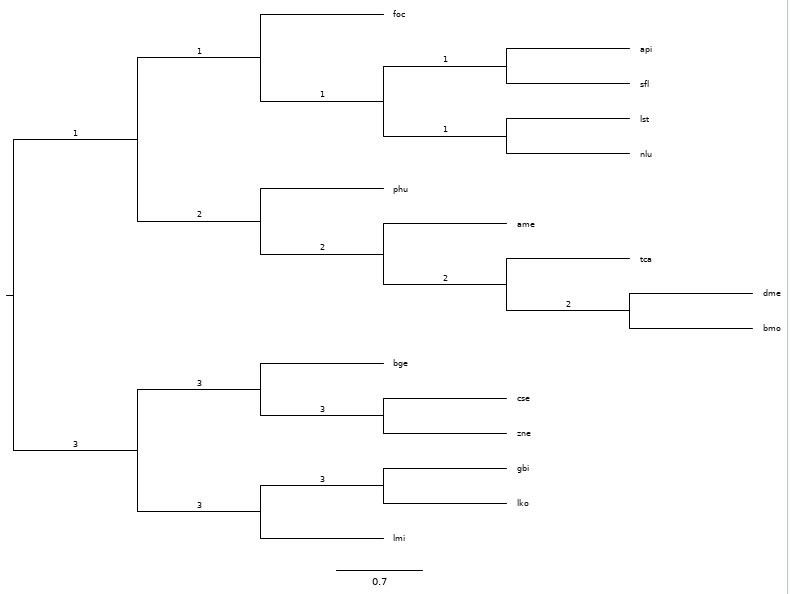

(((1,((1,1)1,(1,1)1)1)1,(2,(2,(2,(2,2)2)2)2)2)1,((3,(3,3)3)3,((3,3)3,3)3)3);




In [3]:
Orthofinder_table_path="Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroups/Orthogroups.GeneCount.tsv"

import csv


largefamiliesfile=open('OGS_Copies_V2.1_largefamilies.tsv', 'w+')

numbertoolarge=0
with open('OGS_Copies_V2.1_filtered.tsv', 'wt') as out_file:
    tsv_writer = csv.writer(out_file, delimiter='\t')
    tsv_writer_largefamily = csv.writer(largefamiliesfile, delimiter='\t')

    with open(Orthofinder_table_path) as tsvfile:
        reader = csv.reader(tsvfile, delimiter='\t')
        for row in reader:
            largestinamily=0
            Copies_family=row[:-1] ## remove last column, "totals"
            if "OG" in Copies_family[0]: # if it is not the first line
                for number in Copies_family[1:]:
                    if int(number)>int(largestinamily):
                        largestinamily=number
                if int(largestinamily)>100:
                    print(Copies_family, "Largest=", largestinamily)
                    numbertoolarge+= 1
                    tsv_writer_largefamily.writerow(['(null)']+row[:-1])
                else:
                    #tsv_writer.writerow(['(null)',"\t".join(row[:-1])])
                    tsv_writer.writerow(['(null)']+row[:-1])
            else:
                #print(row[:-1])#headers
                header="\t".join(row[:-1])
                #lowercaseheader= [item.lower() for item in row[:-1]]
                #tsv_writer.writerow(['Desc']+row[:-1])
                # From Whole name to abbreviation!
                for abb, spp in dictionary_spp_file.items():
                    header = header.replace(spp, abb)
                header2="\t".join(['Desc',header]).split("\t")
                print(header2)   
                tsv_writer.writerow(header2)
                tsv_writer_largefamily.writerow(header2)


print("Number of families  values>100 =", numbertoolarge, " Families filtered")

FileNotFoundError: [Errno 2] No such file or directory: 'Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroups/Orthogroups.GeneCount.tsv'

In [ ]:
"\t".join(['Desc',header])

## Prepare CAFE


I need to prepare the CAFE file with all the scripts

CAFE script:

## CAFE with same lambda

### *CAFE_v2.2.4callibrations_run0*
load -t == Threads
lambda  -t  == difefernt rates birth and death

```
#!cafe
load -i OGS_Copies_V2.1_filtered.tsv -t 8 -l reports/log_V2.2.4callibrations.run0.txt
tree (((Foc:339,((Api:40.38991217,Sfl:40.38991217):254.0640153,(Lst:48.99958058,Nlu:48.99958058):245.4543469):44.5460725):35.82192079,(Phu:362.4323662,(Ame:345,(Tca:314.9941411,(Dme:279.4348203,Bmo:279.4348203):35.55932079):30.00585895):17.43236624):12.38955455):13.58490598,((Bge:112.528622,(Cse:61.00174814,Zne:61.00174814):51.52687381):135.471378,((Gbi:89.20882147,Lko:89.20882147):126.4915381,Lmi:215.7003595):32.29964046):140.4068268);

lambda -s -t  (((1,((1,1)1,(1,1)1)1)1,(1,(1,(1,(1,1)1)1)1)1)1,((1,(1,1)1)1,((1,1)1,1)1)1);

report reports/report_V2.2.4callibrations.run0
```

### Run CAFE

```
~/data_disk/Software/CAFE/release/cafe CAFE_v2.2.4callibrations_run0

```

### Lambda value

From: reports/report_V2.2.4callibrations.run0.cafe

Lambda:	0.00132125



## CAFE with different lambdas

### *CAFE_v2.2.4callibrations_run1*

load -t == Threads
lambda  -t  == difefernt rates birth and death

3 different lambdas:  This tells us that the lineage leading to (and including) Orthopterans+Blattodea  MIGHT have  different  gene  family  evolution  rates than Hemipters, and that Holometabolans+Psocodea might still have different  rates.

```
#!cafe
load -i OGS_Copies_V2.1_filtered.tsv -t 8 -l reports/log_V2.2.4callibrations.run1.txt
tree (((Foc:339,((Api:40.38991217,Sfl:40.38991217):254.0640153,(Lst:48.99958058,Nlu:48.99958058):245.4543469):44.5460725):35.82192079,(Phu:362.4323662,(Ame:345,(Tca:314.9941411,(Dme:279.4348203,Bmo:279.4348203):35.55932079):30.00585895):17.43236624):12.38955455):13.58490598,((Bge:112.528622,(Cse:61.00174814,Zne:61.00174814):51.52687381):135.471378,((Gbi:89.20882147,Lko:89.20882147):126.4915381,Lmi:215.7003595):32.29964046):140.4068268);

lambda -s -t  (((1,((1,1)1,(1,1)1)1)1,(2,(2,(2,(2,2)2)2)2)2)1,((3,(3,3)3)3,((3,3)3,3)3)3);

report reports/report_V2.2.4callibrations.run1
```



### Run CAFE

```
~/data_disk/Software/CAFE/release/cafe CAFE_v2.2.4callibrations_run1

```



## RESULTS run1

Process results 

```
# We provide a convenient script that summarizes the output described above into tables.
# In order to run it, just enter the following command on your shell:
```

```
python cafetutorial_report_analysis.py -i reports/report_V2.2.4callibrations.run1.cafe -o reports/summary_V2.2.4callibrations.run1
```

In [ ]:
# Draw tree

usedtree="(((Foc:339,((Api:40.38991217,Sfl:40.38991217):254.0640153,(Lst:48.99958058,Nlu:48.99958058):245.4543469):44.5460725):35.82192079,(Phu:362.4323662,(Ame:345,(Tca:314.9941411,(Dme:279.4348203,Bmo:279.4348203):35.55932079):30.00585895):17.43236624):12.38955455):13.58490598,((Bge:112.528622,(Cse:61.00174814,Zne:61.00174814):51.52687381):135.471378,((Gbi:89.20882147,Lko:89.20882147):126.4915381,Lmi:215.7003595):32.29964046):140.4068268)"
cafenodetree='(((Foc<0>,((Api<2>,Sfl<4>)<3>,(Lst<6>,Nlu<8>)<7>)<5>)<1>,(Phu<10>,(Ame<12>,(Tca<14>,(Dme<16>,Bmo<18>)<17>)<15>)<13>)<11>)<9>,((Bge<20>,(Cse<22>,Zne<24>)<23>)<21>,((Gbi<26>,Lko<28>)<27>,Lmi<30>)<29>)<25>)<19>'

# rapid evolving
%run cafetutorial_draw_tree.py -i reports/summary_V2.2.4callibrations.run1_node.txt  -t $usedtree -d $cafenodetree -o reports/summary_v2.2.4callibrations_run1_tree_rapid.png -y Rapid
# expansions
%run cafetutorial_draw_tree.py -i reports/summary_V2.2.4callibrations.run1_node.txt  -t $usedtree -d $cafenodetree -o reports/summary_v2.2.4callibrations_run1_tree_Expansions.png -y Expansions
#Contractions
%run cafetutorial_draw_tree.py -i reports/summary_V2.2.4callibrations.run1_node.txt  -t $usedtree -d $cafenodetree -o reports/summary_v2.2.4callibrations_run1_tree_Contractions.png -y Contractions

## Ignore warnings

### CAFE Comparing models with onevsmultipleλ

*CAFE_v2.2.4callibrations_run_lh*

Tha Lambda value calculated from tree with homogeneous lambda=  0.00132125


```
#!cafe
load -i OGS_Copies_V2.1_filtered.tsv -t 36 -l reports/log_V2.2.4callibrations.run_lh.txt

tree (((Foc:339,((Api:40.38991217,Sfl:40.38991217):254.0640153,(Lst:48.99958058,Nlu:48.99958058):245.4543469):44.5460725):35.82192079,(Phu:362.4323662,(Ame:345,(Tca:314.9941411,(Dme:279.4348203,Bmo:279.4348203):35.55932079):30.00585895):17.43236624):12.38955455):13.58490598,((Bge:112.528622,(Cse:61.00174814,Zne:61.00174814):51.52687381):135.471378,((Gbi:89.20882147,Lko:89.20882147):126.4915381,Lmi:215.7003595):32.29964046):140.4068268);


lambda  -l 0.00132125

genfamily  lh_dir/rnd -t 100

lhtest  -d lh_dir  -t (((1,((1,1)1,(1,1)1)1)1,(2,(2,(2,(2,2)2)2)2)2)1,((3,(3,3)3)3,((3,3)3,3)3)3) -l 0.00132125  -o reports/lhtest_result.txt


```



## Run CAFE

```
~/data_disk/Software/CAFE/release/cafe CAFE_v2.2.4callibrations_run_lh

```

From tutorial:

*Here, the genfamily command simulates the datasets (in the example above, we areasking  for  100  simulations  with-t 100).   It  estimates λ from  the  observed  data  to simulate gene families.  Then the likelihoods of the two competing models are calculatedwith the lhtest function, which takes the multi-λ tree structure, and the estimated λ value using the global-λ model*



## RESULTS from Likelihood test

From file reports/log_V2.2.4callibrations.run0.txt (log-likelihoods ar ethe engatove of  the score): -232998.457504
From file reports/log_V2.2.4callibrations.run1.txt (log-likelihoods ar ethe engatove of  the score) -229913.526930

```
cut -f 2,4 reports/lhtest_result.txt > reports/run4_lk_diffs.txt 

Rscript  lhtest.R reports/run4_lk_diffs.txt 
```

From tutorial

*The  numbers −162576.606204  and −149055.330013  are  the  log-likelihoods  of  theg global-λ and multi-λ models from reports /log_run1.txt and reports/log_run3.txt, respectively  (the  negative  log-likelihoods  are  given  in  these  two  files).   Running  the command  above  creates  a  histogram  with  the  null  distribution  from  the  simulations(reports/lk_null.pdf). Note that the observed likelihood ratio (2×(lnLglobal−lnLmulti)) would fall on the far left tail of the null distribution, yielding a very small p-value, and meaning that thethe probability of a multi-λmodel fitting better than a global-λmodel by chance is verysmall*



The likelihood ratio test (LRT) gives a value of "-6169.861"

2*(-232998.457504-(-229913.526930)) = -6169.861


The p value would be the number of times that the random distributions got a LRT lower than -6169.861 divided by 100 tests.

If the 3 of the 100 tests have a LTR < -6169.861 , pvalue=3/100=0.03





## CAFE check Errors


Since the multi lamda assumptoion was better than the global lambda, I proceed with 

### Calculate error

***The Expansion/Contraction trees*** show ALL teh expanded/contracted famileis, NOT only the significant. In the file *reports/FILE_pub.txt* there is the number of significant in prentesis.


The P-value sed is  "P-value: 0.01" as pointed out at *reports/log_FILE.txt* .


CAFE can correct by errors on genome assembly/annotation

Re-estimate lambdas using this errorr model (MUST be ran with same lambda for whole tree, after getting the error, will run CAFE again with different lambdas but considering the error):

File: CAFE_v2.2.4_calculaterror

```
#!cafe

load -i OGS_Copies_V2.1_filtered.tsv -t 8 -l reports/log_V2.2.4calculaterror.run1.txt
tree (((Foc:339,((Api:40.38991217,Sfl:40.38991217):254.0640153,(Lst:48.99958058,Nlu:48.99958058):245.4543469):44.5460725):35.82192079,(Phu:362.4323662,(Ame:345,(Tca:314.9941411,(Dme:279.4348203,Bmo:279.4348203):35.55932079):30.00585895):17.43236624):12.38955455):13.58490598,((Bge:112.528622,(Cse:61.00174814,Zne:61.00174814):51.52687381):135.471378,((Gbi:89.20882147,Lko:89.20882147):126.4915381,Lmi:215.7003595):32.29964046):140.4068268);

lambda -s -t  (((1,((1,1)1,(1,1)1)1)1,(1,(1,(1,(1,1)1)1)1)1)1,((1,(1,1)1)1,((1,1)1,1)1)1);

report reports/report_V2.2.4calculaterror.run1

```

Calculate Error model:

```
python  caferror.py -i CAFE_v2.2.4_calculaterror -v 0 -f 1
```

End of log file: caferror_1/caferrorLog.txt   (didnt use the reports/log_V2.2.4calculaterror* files, because obveis tha -d parameter from caferror which i left empty and by default created caferror_1)

```
# =======================================================================
# ************************************
# Score with no errormodel:        232998.456131
# Lambda with no errormodel:       0.00132125965133
# ************************************
# Global Error Estimation:         0.021337890625
# Score with global errormodel:    232459.837134
# Lambda with global errormodel:   0.00126686991522
# ************************************
# =======================================================================

```

File: caferror_1/caferror_default_output.txt

```
ErrorModel	Score
0.4	232998.456131
0.4	258282.847854
0.2	240596.103286
0.1	234642.056371
0.05	232846.652157
0.025	232467.682988
0.0125	232519.290722
0.03125	232514.448907
0.021875	232459.973763
0.0171875	232472.003520
0.04375	232708.562177
0.03046875	232506.518755
0.023828125	232463.438689
0.0205078125	232460.386618
0.02216796875	232460.223555
0.021337890625	232459.837134
0.0209228515625	232459.978250
```


Best error model:  0.021337890625





### RUN CAFE correcting for genome qulaity

File: CAFE_v2.2.4_corrected


```
#!cafe
load -i OGS_Copies_V2.1_filtered.tsv -t 8 -l reports/log_V2.2.4_corrected.txt
tree (((Foc:339,((Api:40.38991217,Sfl:40.38991217):254.0640153,(Lst:48.99958058,Nlu:48.99958058):245.4543469):44.5460725):35.82192079,(Phu:362.4323662,(Ame:345,(Tca:314.9941411,(Dme:279.4348203,Bmo:279.4348203):35.55932079):30.00585895):17.43236624):12.38955455):13.58490598,((Bge:112.528622,(Cse:61.00174814,Zne:61.00174814):51.52687381):135.471378,((Gbi:89.20882147,Lko:89.20882147):126.4915381,Lmi:215.7003595):32.29964046):140.4068268);

lambda -s -t  (((1,((1,1)1,(1,1)1)1)1,(2,(2,(2,(2,2)2)2)2)2)1,((3,(3,3)3)3,((3,3)3,3)3)3);

errormodel  -model caferror_1/cafe_errormodel_0.021337890625.txt  -all


report reports/log_V2.2.4_corrected


```

Run:

```
~/data_disk/Software/CAFE/release/cafe CAFE_v2.2.4_corrected

```

### RESULTS after Correcting by genome quality

Process results 

```
python  cafetutorial_report_analysis.py -i reports/log_V2.2.4_corrected.cafe -o reports/summary_V2.2.4_corrected
```

In [ ]:
# Draw tree

usedtree="(((Foc:339,((Api:40.38991217,Sfl:40.38991217):254.0640153,(Lst:48.99958058,Nlu:48.99958058):245.4543469):44.5460725):35.82192079,(Phu:362.4323662,(Ame:345,(Tca:314.9941411,(Dme:279.4348203,Bmo:279.4348203):35.55932079):30.00585895):17.43236624):12.38955455):13.58490598,((Bge:112.528622,(Cse:61.00174814,Zne:61.00174814):51.52687381):135.471378,((Gbi:89.20882147,Lko:89.20882147):126.4915381,Lmi:215.7003595):32.29964046):140.4068268)"
cafenodetree='(((Foc<0>,((Api<2>,Sfl<4>)<3>,(Lst<6>,Nlu<8>)<7>)<5>)<1>,(Phu<10>,(Ame<12>,(Tca<14>,(Dme<16>,Bmo<18>)<17>)<15>)<13>)<11>)<9>,((Bge<20>,(Cse<22>,Zne<24>)<23>)<21>,((Gbi<26>,Lko<28>)<27>,Lmi<30>)<29>)<25>)<19>'

# rapid evolving
%run cafetutorial_draw_tree.py -i reports/summary_V2.2.4_corrected_node.txt -t $usedtree -d $cafenodetree -o reports/summary_V2.2.4_corrected_Rapid.png -y Rapid
# expansions
%run cafetutorial_draw_tree.py -i reports/summary_V2.2.4_corrected_node.txt -t $usedtree -d $cafenodetree -o reports/summary_V2.2.4_corrected_Expanisons.png -y Expansions
# #Contractions
%run cafetutorial_draw_tree.py -i reports/summary_V2.2.4_corrected_node.txt -t $usedtree -d $cafenodetree -o reports/summary_V2.2.4_corrected_Contractions.png -y Contractions

## Ignore warnings

## CAFE Large families:

CAFE has issues compiuting lambdas when there are large families (>100 genes). They recomment tho compute those at the end using the previously computed lambdas:

File with gene families with > 100 genes: OGS_Copies_V2.1_largefamilies.tsv

Lambdas from: reports/log_V2.2.4_corrected.cafe


File: CAFE_v2.2.4_largefamilies

```
#!cafe
load -i OGS_Copies_V2.1_largefamilies.tsv -t 8 -l reports/log_V2.2.4_largefamilies.txt
tree (((Foc:339,((Api:40.38991217,Sfl:40.38991217):254.0640153,(Lst:48.99958058,Nlu:48.99958058):245.4543469):44.5460725):35.82192079,(Phu:362.4323662,(Ame:345,(Tca:314.9941411,(Dme:279.4348203,Bmo:279.4348203):35.55932079):30.00585895):17.43236624):12.38955455):13.58490598,((Bge:112.528622,(Cse:61.00174814,Zne:61.00174814):51.52687381):135.471378,((Gbi:89.20882147,Lko:89.20882147):126.4915381,Lmi:215.7003595):32.29964046):140.4068268);

lambda -l 0.00172492 0.000778238 0.00151124 -t  (((1,((1,1)1,(1,1)1)1)1,(2,(2,(2,(2,2)2)2)2)2)1,((3,(3,3)3)3,((3,3)3,3)3)3);

report reports/log_V2.2.4_largefamilies




report reports/log_V2.2.4_largefamilies


```


Run:

```
~/data_disk/Software/CAFE/release/cafe CAFE_v2.2.4_largefamilies

```

### RESULTS for Lareg Families

Process results 

```
python  cafetutorial_report_analysis.py -i reports/log_V2.2.4_largefamilies.cafe -o reports/summary_V2.2.4_largefamilies
```

In [ ]:
# Draw tree

usedtree="(((Foc:339,((Api:40.38991217,Sfl:40.38991217):254.0640153,(Lst:48.99958058,Nlu:48.99958058):245.4543469):44.5460725):35.82192079,(Phu:362.4323662,(Ame:345,(Tca:314.9941411,(Dme:279.4348203,Bmo:279.4348203):35.55932079):30.00585895):17.43236624):12.38955455):13.58490598,((Bge:112.528622,(Cse:61.00174814,Zne:61.00174814):51.52687381):135.471378,((Gbi:89.20882147,Lko:89.20882147):126.4915381,Lmi:215.7003595):32.29964046):140.4068268)"
cafenodetree='(((Foc<0>,((Api<2>,Sfl<4>)<3>,(Lst<6>,Nlu<8>)<7>)<5>)<1>,(Phu<10>,(Ame<12>,(Tca<14>,(Dme<16>,Bmo<18>)<17>)<15>)<13>)<11>)<9>,((Bge<20>,(Cse<22>,Zne<24>)<23>)<21>,((Gbi<26>,Lko<28>)<27>,Lmi<30>)<29>)<25>)<19>'

# rapid evolving
%run cafetutorial_draw_tree.py -i reports/summary_V2.2.4_largefamilies_node.txt -t $usedtree -d $cafenodetree -o reports/summary_V2.2.4_largefamilies_Rapid.png -y Rapid
# expansions
%run cafetutorial_draw_tree.py -i reports/summary_V2.2.4_largefamilies_node.txt -t $usedtree -d $cafenodetree -o reports/summary_V2.2.4_largefamilies_Expanisons.png -y Expansions
# #Contractions
%run cafetutorial_draw_tree.py -i reports/summary_V2.2.4_largefamilies_node.txt -t $usedtree -d $cafenodetree -o reports/summary_V2.2.4_largefamilies_Contractions.png -y Contractions

## Ignore warnings

In [ ]:
## PARSE RESULTS MYSELF

### I can get the OGS significantly gained/lost at any node

#Node="Lko"
Node="<27>"# Gbi+Lko
#Node="<29>"# Gbi+Lko+Lmi

with open("reports/summary_V2.2.4_largefamilies_fams.txt") as f:
    for line in f:
        #print(line)
        #f line.startswith("<"):
            #print(line)
        if line.startswith(Node):
            print(line)
            Expan=0
            Reduc=0
            OGs=line.split(",")
            for items in OGs:
                itemsplit=items.split("[")[1].split("*")[0]
                print(itemsplit)
                if "+" in itemsplit:
                    Expan+= 1
                if "-" in itemsplit:
                    Reduc+= 1
            print("Number of OGs=", len(OGs))
            print("Number of OG Expantions= ",Expan, " Number of OG Contractions= ", Reduc )


In [ ]:
## Print All the OGs significant in each branch  in files


#CAFE_resultsfile="reports/summary_V2.2.4_largefamilies_fams.txt"
#CAFE_resultsfile="reports/summary_run2_aftererror_fams.txt"


linenum=0
with open(CAFE_resultsfile) as f:
    for line in f:
        linenum=+1
        line=line.rstrip()
        #print(line)
        #f line.startswith("<"):
            #print(line)
        if "<" in line.split("\t")[0] :
            node=line.split(":")[0]
            print("Node= ",node)
            #filename_expa="Expansions_Contractions/Expansion_node"+node+".txt"
            #filename_cont="Expansions_Contractions/Contraction_node"+node+".txt"
            #filename_expa="Expansions_Contractions/Largefamily_Expansion_node"+node+".txt"
            #filename_cont="Expansions_Contractions/Largefamily_Contraction_node"+node+".txt"
            f1= open(filename_expa,"w+")
            f2= open(filename_cont,"w+")
        else:
            node="no node line"
        try:
            #print(line)q
            Expan=0
            Reduc=0
            OGs=line.split(",")

            for items in OGs:
                itemsplit=items.split("[")[1].split("*")[0]
                if "+" in itemsplit:
                    Expan+= 1
                    print(itemsplit,"-->", items.split("[")[0], " -> Expansion")
                    f1.write(items.split("[")[0]+"\t"+itemsplit+"\n")
                if "-" in itemsplit:
                    Reduc+= 1
                    print(itemsplit,"-->",  items.split("[")[0] , " -> Contraction")
                    f2.write(items.split("[")[0]+"\t"+itemsplit+"\n")
            f1.close() 
            f2.close() 
            print("Number of OGs=", len(OGs))
            print("Number of OG Expantions= ",Expan, " Number of OG Contractions= ", Reduc )
        except:
            print("\n Line", linenum, "does not contain a branch:")
            

In [ ]:
filename_cont="Expansions_Contractions/Contraction_node"+node+".txt"    
print("".join(filename_cont) )

# Functional Analysis Expansions and Contractions

After identifying gene ffamily expansions and contractions, I would like to know their functions.


I installed interproscan-5.36-75



In [ ]:
## FUNCTIONS later called to annotate OGs

####################
# Function to process Interproscan output
def fucntionSummarizeIpr(OGipr):
    outputdict=dict()
    pfamDesc=dict()
    pfamID=dict()
    godict=dict()
    godictnames=dict()
    seqiddict=dict()
    gos=[]

    #OGipr="OG0000026.fa.tsv"
    file="Expansions_Contractions/Interproscan5_output/%s" %OGipr 

    with open(file)as f:
        for lines in f:
            lines=lines.rstrip()
            fields=lines.split("\t")
            seqid=fields[0]
            #print(seqid)
            if seqid not in seqiddict:
                seqiddict[seqid]=1
                lines=lines.rstrip()
                Org=fields[0].split("_")[0]
                pfam=fields[4]
                if pfam in pfamID:
                    pfamID[pfam]=pfamID[pfam]+1
                else:
                    pfamID[pfam]=1
                    pfamDesc[pfam]=fields[5]

                try:
                    gos=fields[13].split("|")
                    for got in gos:
                        if got in godict:
                            godict[got]=godict[got]+1
                        else:
                            godict[got]=1  

                except:
                    gos="NA"
                    #print("No GO", lines)
                #print(Org, seqid,pfam, pfamd, gos)
    print("Number of seqsin OG:", len(seqiddict))

    for key in pfamID:
        print(key , pfamID[key],pfamDesc[key])
    for key in godict:
        print(key , godict[key],getGOinfo(key)[1], getGOinfo(key)[2])
    for key in godict:
        godictnames[key]= [ godict[key], getGOinfo(key)[1], getGOinfo(key)[2]]
        
    outputdict["pfamids"]=pfamID 
    outputdict["pfamdesc"]=pfamDesc 
    outputdict["goterms"]=godictnames 

    return(outputdict)





#ipprs_cancommand="~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh -d Interproscan5_output --goterms -appl Pfam -i  Contraction_nodeGbi\<6\>.txt" % INPUTFILE


############# function run interproscan and get output
def iprscanfunc(file):
    OGseqsfile=OGseqsfileDir+file
    copyfile(OGseqsfile, "Expansions_Contractions/OG_seqs/"+file)
    replace_stars_command='sed  -i "s/\*//g" %s' % "Expansions_Contractions/OG_seqs/"+file
    print(replace_stars_command)
    subprocess.run(replace_stars_command,shell=True)
    ipprs_cancommand="~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  %s" % "Expansions_Contractions/OG_seqs/"+file
    print(ipprs_cancommand)
    subprocess.run(ipprs_cancommand,shell=True)
    
####################
## Function to get GO names and descriptors from GO term
def getGOinfo(GOterm):
    responseBody=[]
    requestURL = "https://www.ebi.ac.uk/QuickGO/services/ontology/go/terms/%s" % GOterm
    r = requests.get(requestURL, headers={ "Accept" : "application/json"})

    if not r.ok:
      r.raise_for_status()
      sys.exit()

    responseBody = r.json()
    
    return(responseBody["results"][0]["id"], responseBody["results"][0]["name"], responseBody["results"][0]["definition"]["text"] )

####################


## I downlaod Dmel Id mapping file  wget ftp://ftp.flybase.net/releases/current/precomputed_files/genes/fbgn_annotation_ID_fb_2019_03.tsv.gz

# Function for given a drosophila gene ID (GCXXX) get the FlyBase id (using ID file) and getting summary using API

#file="OG0000001.fa"
def checkflybase(file):

    data = pd.read_csv("fbgn_annotation_ID_fb_2019_03.tsv", sep="\t",skiprows=4, engine='python') 
    data.head()

    FlybaseDictOut= dict()


    OGseqsfile=OGseqsfileDir+file
    print(OGseqsfile)
    with open(OGseqsfile, "r") as fp:
        for line in fp:
            if line.startswith(">Dme"):
                GCid=line.split("_")[1].strip()
                FlybaseGB=data[data['annotation_ID'] == GCid ]['primary_FBgn#'].item()
                GeneSymbol=data[data['annotation_ID'] == GCid ]['##gene_symbol'].item()
                print(GCid,FlybaseGB)
                #using flybase API to get gene summary
                requestURL = "https://api.flybase.org/api/v1.0/gene/summaries/auto/%s" % FlybaseGB
                try:
                    responseBody = requests.get(requestURL, headers={ "Accept" : "application/json"}).json()
                    GeneSummary=responseBody["resultset"]["result"][0]['summary']
                except:
                    GeneSummary="NA"

                tempdict=dict()
                tempdict={GCid: {"FlybaseGB":FlybaseGB, "GeneSymbol":GeneSymbol, "GeneSummary":GeneSummary}}
                FlybaseDictOut.update(tempdict)
            
    return(FlybaseDictOut)
####################

In [ ]:
import pandas as pd
import re, os, subprocess, sys,glob
from shutil import copyfile
import requests, sys, json


OGseqsfileDir='/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/'

CAFE_resultsfile="reports/summary_V2.2.4_corrected_fams.txt"

#CAFE_resultsfile="reports/summary_V2.2.4_largefamilies_fams.txt"


linenum=0
with open(CAFE_resultsfile) as f:
    for line in f:
        done=False
        linenum=linenum+1
        line=line.rstrip()
        #print(line)
        #f line.startswith("<"):
            #print(line)
        if "<" in line.split("\t")[0] :
            node=line.split(":")[0]
            print("\n\n Node= ",node, "\n\n")
#             filename_expa="Expansions_Contractions/Largefamily_Expansion_node"+node+".txt"
#             filename_cont="Expansions_Contractions/Largefamily_Contraction_node"+node+".txt"
            filename_expa="Expansions_Contractions/Expansion_node"+node+".txt"
            filename_cont="Expansions_Contractions/Contraction_node"+node+".txt"
            #### Check if node alreay analyzed (to avou repeating if fails)
            if os.path.exists(filename_expa):
                print("Previously computed!")
                done=True 
                
            else:    
                f1= open(filename_expa,"w+")
                f2= open(filename_cont,"w+")
                f1.write("Number of expanded OG : "+str(line.count("+"))+"\n")
                f2.write("Number of contracted OG : "+str(line.count("-") )+"\n")
        else:
            node="no node line"
        if ">" in line and not "#" in line and done == False:
            print(line)
            Expan=0
            Reduc=0
            OGs=line.split(",")

            for items in OGs:
                try: 
                    itemsplit=items.split("[")[1].split("*")[0]
                except:
                    print("No expantions/contractions")
                    itemsplit="No expansions or contractions"
                if "+" in itemsplit:
                    Expan+= 1
                    print(itemsplit,"-->", items.split("[")[0], " -> Expansion")
                    ### Fucntional Annotation interporscan   
                    fastafilename= re.sub(r'.*OG', 'OG', items)#.split("[")[0]+".fa"
                    fastafilename=fastafilename.split("[")[0]+".fa"
                    f1.write(fastafilename+"\n")
                    f1.write("\tExpansion size: "+itemsplit+"\n")
                    
                    print(fastafilename)
                    iprscanfunc(fastafilename)
                    IPRresults= fucntionSummarizeIpr(fastafilename+".tsv")
                    if len(IPRresults['pfamids'].keys())>0:                   
                        f1.write("\t\t Num. of Genes with the PFAM \t PFAM ID \t PFAM descriptor\n")
                        for key in IPRresults['pfamids']:
                            f1.write("\t\t"+str(IPRresults['pfamids'][key])+"\t"+key+"\t"+str(IPRresults['pfamdesc'][key])+"\n")
                    if len(IPRresults['goterms'].keys())>0:
                        f1.write("\t\t Num. of Genes with the GOterm \t GOterms \t GOterm name \t GO Term descriptor\n")
                        for key in IPRresults['goterms']:
                            f1.write("\t\t"+str(IPRresults['goterms'][key][0])+"\t"+key+"\t"+IPRresults['goterms'][key][1]+"\t"+IPRresults['goterms'][key][2]+"\n")                   
                    FlyBaseInfo=checkflybase(fastafilename)# check if any gene in OG is from dmel and get info from flybase
                    if len(FlyBaseInfo.keys())>0:                   
                        f1.write("\t\t Dmel Genes in OG \t Gene ID \t Flybase ID \t GeneSymbol \t Flybase Summary\n")
                        for key in FlyBaseInfo:
                            f1.write("\t\t\t"+key+"\t"+str(FlyBaseInfo[key]['FlybaseGB'])+"\t"+str(FlyBaseInfo[key]['GeneSymbol'])+"\t"+str(FlyBaseInfo[key]['GeneSummary'])+"\n" )            
                 
                if "-" in itemsplit:
                    Reduc+= 1
                    print(itemsplit,"-->",  items.split("[")[0] , " -> Contraction")


                    ### Fucntional Annotation interporscan   
                    fastafilename= re.sub(r'.*OG', 'OG', items)#.split("[")[0]+".fa"
                    fastafilename=fastafilename.split("[")[0]+".fa"
                    f2.write(fastafilename+"\n")
                    f2.write("\tContraction size: "+itemsplit+"\n")
                    
                    print(fastafilename)
                    iprscanfunc(fastafilename)
                    IPRresults= fucntionSummarizeIpr(fastafilename+".tsv")
                    if len(IPRresults['pfamids'].keys())>0:                   
                        f2.write("\t\t Num. of Genes with the PFAM \t PFAM ID \t PFAM descriptor\n")
                        for key in IPRresults['pfamids']:
                            f2.write("\t\t"+str(IPRresults['pfamids'][key])+"\t"+key+"\t"+str(IPRresults['pfamdesc'][key])+"\n")
                    if len(IPRresults['goterms'].keys())>0:                  
                        f2.write("\t\t Num. of Genes with the GOterm \t GOterms \t GOterm name \t GO Term descriptor\n")
                        for key in IPRresults['goterms']:
                            f2.write("\t\t"+str(IPRresults['goterms'][key][0])+"\t"+key+"\t"+IPRresults['goterms'][key][1]+"\t"+IPRresults['goterms'][key][2]+"\n")                   
                    FlyBaseInfo=checkflybase(fastafilename)# check if any gene in OG is from dmel and get info from flybase
                    if len(FlyBaseInfo.keys())>0:
                        f2.write("\t\t Dmel Genes in OG \t Gene ID \t Flybase ID \t GeneSymbol \t Flybase Summary\n")
                        for key in FlyBaseInfo:
                            f2.write("\t\t\t"+key+"\t"+str(FlyBaseInfo[key]['FlybaseGB'])+"\t"+str(FlyBaseInfo[key]['GeneSymbol'])+"\t"+str(FlyBaseInfo[key]['GeneSummary'])+"\n" )            

                    #f2.write(items.split("[")[0]+"\t"+itemsplit+"\n")
            f1.close() 
            f2.close() 
            print("Number of OGs=", len(OGs))
            print("Number of OG Expantions= ",Expan, " Number of OG Contractions= ", Reduc )
        else:
            print("\n Line", linenum, "does not contain a branch:")
            

        
#ipprs_cancommand="~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh -d Interproscan5_output --goterms -appl Pfam -i  Contraction_nodeGbi\<6\>.txt" % INPUTFILE


# References 

CAFE Tutorial: https://iu.app.box.com/v/cafetutorial-files


